In [2]:
import numpy as np
from scipy.stats.distributions import norm
import matplotlib.pylab as plt
import sys
sys.path.append('../zdrojaky')
from tsplot import tsplot
import statsmodels.tsa as tsa
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.api import qqplot
import warnings; warnings.simplefilter('ignore')

# Odhad AR(I)MA modelu

V souboru `arimadata.npz` najdete časovou řadu, imitující vývoj hodnoty akcií na trhu. Máme zkusit nafitovat odpovídající model, odhadnout jeho parametry a analyzovat rezidua. K tomu všemu využijeme `statsmodels`.

**Úkol: do proměnné data natáhněte časovou řadu.**

In [3]:
fn = '../zdrojaky/arimadata.npz'
data = np.load(fn)
data = data['data']

**Úkol: proveďte analýzu pomocí funkce `tsplot()` a diskutujte vlastnosti časové řady.**

<Figure size 1080x216 with 0 Axes>

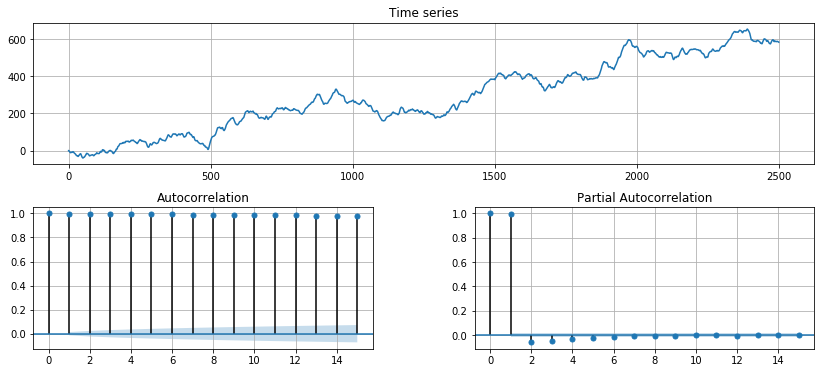

In [4]:
plt.figure(figsize=(15,3))
tsplot(data)

**Úkol: pokud se to zdá být výhodné, diferencujte časovou řadu a analyzujte výsledek. Bylo by výhodné diferencovat jednou? Dvakrát?**

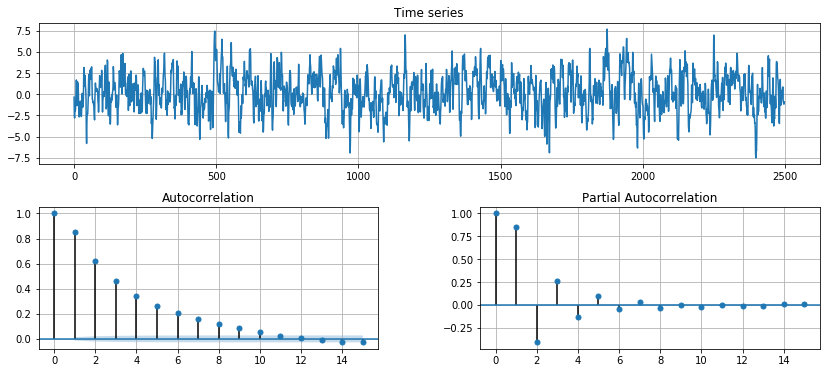

In [6]:
data_d1 = data[1:] - data[:-1]
#data_d1 = data_d1[1:] - data_d1[:-1]
tsplot(data_d1)

**Úkol: co soudit o výsledku? Jeví se jako stacionární časová řada? Jaký model budeme zkoušet?**

**Úkol: rozhodnete-li se pro ARMA model, můžeme zkusit najít řád pomocí funkce `tsa.stattools.arma_order_select_ic()`. Porovnejte výsledky pro různá informační kritéria.**

In [7]:
tsa.stattools.arma_order_select_ic(data_d1, trend='nc', ic='bic')

{'bic':              0            1            2
 0          NaN  8574.350695  7630.732258
 1  7798.201663  7097.110553  7104.876083
 2  7348.791532  7104.881224  7112.303098
 3  7183.185746  7111.535975  7118.823944
 4  7144.176322  7119.064779  7126.636740, 'bic_min_order': (1, 1)}

**Úkol: nafitujte vybraný model (bez trendu). V metodě `summary()` naleznete vlastnosti modelu. Diskutujte o nich.**

In [12]:
arma = ARMA(data_d1, order=(1,1)).fit(trend='nc')
print(arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2499
Model:                     ARMA(1, 1)   Log Likelihood               -3536.820
Method:                       css-mle   S.D. of innovations              0.996
Date:                Mon, 29 Oct 2018   AIC                           7079.640
Time:                        11:40:47   BIC                           7097.111
Sample:                             0   HQIC                          7085.983
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7304      0.015     50.068      0.000       0.702       0.759
ma.L1.y        0.6372      0.016     39.287      0.000       0.605       0.669
                                    Roots           

**Úkol: proveďte analýzu reziduí, tj. (1) vykreslete řadu, ACF a PACF funkcí `tsplot()`**

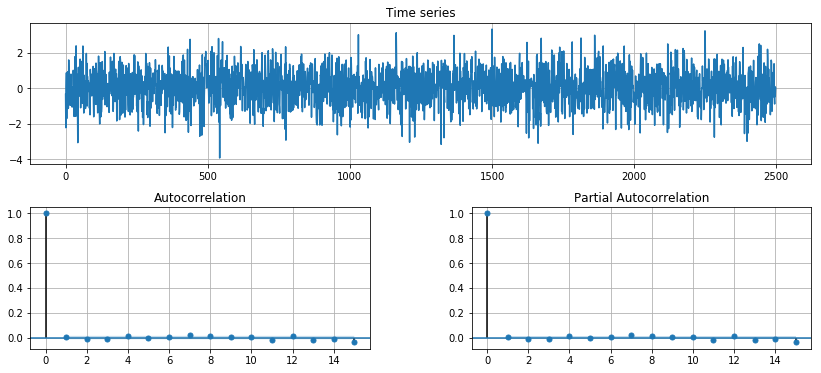

In [7]:
tsplot(arma.resid)
plt.show()

**(2) vykreslete qq-plot funkcí `qqplot()` - prozkoumejte její možnosti.**

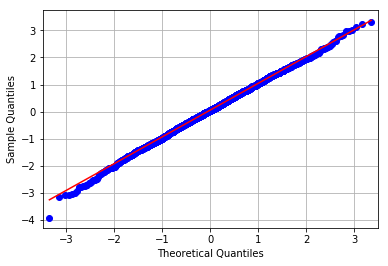

In [16]:
qqplot(arma.resid, line='q')
plt.show()

**(3) vykreslete histogram reziduí.**

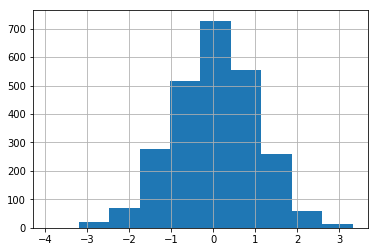

In [9]:
plt.hist(arma.resid)
plt.show()

**Úkol: zkuste nafitovat model ARIMA pomocí `statsmodels.tsa.arima_model.ARIMA`**